In [56]:
#预测房屋价格（回归问题）

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape) #404行，13列
print(test_data.shape)

(404, 13)
(102, 13)


In [52]:
train_data[0]
#test_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [57]:
#数据处理
#输入数据的每个特征（列）减去特征的平均值，再除以标准差

mean = train_data.mean(axis=0) #axis=0，则沿着纵轴进行操作，若axis=1则沿着横轴进行操作。但是这只是仅仅对于二维数组而言。
train_data = train_data-mean
std = train_data.std(axis=0) #可以总结为一句话：设axis=i ,则numpy沿着第i个下标变化的方向进行操作
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

In [18]:
#建模

from keras import models
from keras.layers import Dense

def build_model(): #因为需要多次调用模型，使用函数
    model = models.Sequential()
    model.add(Dense(64, activation='relu', input_dim=train_data.shape[1],)) #特别注意是以train_data的列形状作为输入，即特征值的数量而不是样本数量
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1)) #回归专用，且不需要有激活函数
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [19]:
#划分验证集和测试集，编写交叉检验代码

import numpy as np

k = 4 #分组数量
num_val_samples = len(train_data) // k
num_epochs = 100 #迭代次数，训练模型时才用
all_scores = []

for i in range(k):
    print('进行第{}个验证批次'.format(str(i)))
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] #第k个分区的验证用数据
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)#按照列合并除验证集外的数据
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0) 
    
    model = build_model()
    
    #先在训练数据里交叉验证整体模型，迭代100次。这里batch_size=1是因为回归对每个单个样本为一个小批次数量
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1) 
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
all_scores #[2.2714590554190153, 2.221911340656847, 2.9174803176728807, 2.344696856371247]

进行第0个验证批次
Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 208.7181 - mean_absolute_error: 10.9305
Epoch 2/100
303/303 [==============================] - 0s 497us/step - loss: 30.3630 - mean_absolute_error: 3.8219
Epoch 3/100
303/303 [==============================] - 0s 487us/step - loss: 21.7982 - mean_absolute_error: 3.0445
Epoch 4/100
303/303 [==============================] - 0s 493us/step - loss: 19.0109 - mean_absolute_error: 2.8765
Epoch 5/100
303/303 [==============================] - 0s 490us/step - loss: 16.9934 - mean_absolute_error: 2.6795
Epoch 6/100
303/303 [==============================] - 0s 467us/step - loss: 15.5611 - mean_absolute_error: 2.5542
Epoch 7/100
303/303 [==============================] - 0s 461us/step - loss: 14.9166 - mean_absolute_error: 2.4841
Epoch 8/100
303/303 [==============================] - 0s 461us/step - loss: 13.8702 - mean_absolute_error: 2.4859
Epoch 9/100
303/303 [==============================] - 0s 464us/step -

303/303 [==============================] - 0s 440us/step - loss: 5.3513 - mean_absolute_error: 1.5098
Epoch 73/100
303/303 [==============================] - 0s 434us/step - loss: 5.4720 - mean_absolute_error: 1.5664
Epoch 74/100
303/303 [==============================] - 0s 448us/step - loss: 5.1316 - mean_absolute_error: 1.5102
Epoch 75/100
303/303 [==============================] - 0s 448us/step - loss: 5.6220 - mean_absolute_error: 1.5233
Epoch 76/100
303/303 [==============================] - 0s 438us/step - loss: 5.3714 - mean_absolute_error: 1.5125
Epoch 77/100
303/303 [==============================] - 0s 441us/step - loss: 5.1731 - mean_absolute_error: 1.4388
Epoch 78/100
303/303 [==============================] - 0s 444us/step - loss: 5.0076 - mean_absolute_error: 1.4817
Epoch 79/100
303/303 [==============================] - 0s 441us/step - loss: 5.4615 - mean_absolute_error: 1.4760
Epoch 80/100
303/303 [==============================] - 0s 441us/step - loss: 5.2155 - mean_a

303/303 [==============================] - 0s 450us/step - loss: 7.2519 - mean_absolute_error: 1.7179
Epoch 44/100
303/303 [==============================] - 0s 441us/step - loss: 7.2801 - mean_absolute_error: 1.7473
Epoch 45/100
303/303 [==============================] - 0s 441us/step - loss: 6.7123 - mean_absolute_error: 1.6728
Epoch 46/100
303/303 [==============================] - 0s 444us/step - loss: 7.1373 - mean_absolute_error: 1.6805
Epoch 47/100
303/303 [==============================] - 0s 441us/step - loss: 7.3340 - mean_absolute_error: 1.6802
Epoch 48/100
303/303 [==============================] - 0s 441us/step - loss: 7.5027 - mean_absolute_error: 1.7008
Epoch 49/100
303/303 [==============================] - 0s 441us/step - loss: 7.0034 - mean_absolute_error: 1.6682
Epoch 50/100
303/303 [==============================] - 0s 441us/step - loss: 6.9915 - mean_absolute_error: 1.6741
Epoch 51/100
303/303 [==============================] - 0s 441us/step - loss: 7.0798 - mean_a

303/303 [==============================] - 0s 481us/step - loss: 8.4773 - mean_absolute_error: 2.0322
Epoch 15/100
303/303 [==============================] - 0s 480us/step - loss: 8.0545 - mean_absolute_error: 2.0860
Epoch 16/100
303/303 [==============================] - 0s 451us/step - loss: 8.4095 - mean_absolute_error: 2.0119
Epoch 17/100
303/303 [==============================] - 0s 451us/step - loss: 7.9719 - mean_absolute_error: 1.9938
Epoch 18/100
303/303 [==============================] - 0s 453us/step - loss: 8.1020 - mean_absolute_error: 1.9690
Epoch 19/100
303/303 [==============================] - 0s 454us/step - loss: 7.3202 - mean_absolute_error: 1.9304
Epoch 20/100
303/303 [==============================] - 0s 448us/step - loss: 7.7688 - mean_absolute_error: 1.9581
Epoch 21/100
303/303 [==============================] - 0s 448us/step - loss: 7.5670 - mean_absolute_error: 1.9187
Epoch 22/100
303/303 [==============================] - 0s 454us/step - loss: 7.4939 - mean_a

303/303 [==============================] - 0s 451us/step - loss: 3.6955 - mean_absolute_error: 1.3756
Epoch 86/100
303/303 [==============================] - 0s 451us/step - loss: 3.5023 - mean_absolute_error: 1.3498
Epoch 87/100
303/303 [==============================] - 0s 448us/step - loss: 3.5743 - mean_absolute_error: 1.3130
Epoch 88/100
303/303 [==============================] - 0s 444us/step - loss: 3.1743 - mean_absolute_error: 1.3035
Epoch 89/100
303/303 [==============================] - 0s 448us/step - loss: 3.3424 - mean_absolute_error: 1.2358
Epoch 90/100
303/303 [==============================] - 0s 444us/step - loss: 3.5741 - mean_absolute_error: 1.3422
Epoch 91/100
303/303 [==============================] - 0s 448us/step - loss: 3.3638 - mean_absolute_error: 1.3108
Epoch 92/100
303/303 [==============================] - 0s 444us/step - loss: 3.0893 - mean_absolute_error: 1.2821
Epoch 93/100
303/303 [==============================] - 0s 466us/step - loss: 3.1244 - mean_a

303/303 [==============================] - 0s 451us/step - loss: 6.2750 - mean_absolute_error: 1.5560
Epoch 57/100
303/303 [==============================] - 0s 454us/step - loss: 5.9616 - mean_absolute_error: 1.5792
Epoch 58/100
303/303 [==============================] - 0s 451us/step - loss: 6.4773 - mean_absolute_error: 1.5836
Epoch 59/100
303/303 [==============================] - 0s 451us/step - loss: 6.1131 - mean_absolute_error: 1.5501
Epoch 60/100
303/303 [==============================] - 0s 448us/step - loss: 6.1107 - mean_absolute_error: 1.5540
Epoch 61/100
303/303 [==============================] - 0s 448us/step - loss: 6.1097 - mean_absolute_error: 1.5675
Epoch 62/100
303/303 [==============================] - 0s 448us/step - loss: 5.7063 - mean_absolute_error: 1.4943
Epoch 63/100
303/303 [==============================] - 0s 462us/step - loss: 5.9007 - mean_absolute_error: 1.5478
Epoch 64/100
303/303 [==============================] - 0s 454us/step - loss: 5.4665 - mean_a

[2.2714590554190153, 2.221911340656847, 2.9174803176728807, 2.344696856371247]

In [20]:
#修改训练次数，并记录与验证集的对比

num_epochs = 500 #迭代次数，训练模型时才用
all_mae_scores = []

for i in range(k):
    print('进行第{}个验证批次'.format(str(i)))
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] #第k个分区的验证用数据
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)#按照列合并除验证集外的数据
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0) 
    
    model = build_model()
    
    #记录下带入测试集的对比数据
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0,
                       validation_data=(val_data, val_targets)) 
    mae_history = history.history['val_mean_absolute_error']
    #val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_mae_scores.append(mae_history)
    
all_mae_scores

进行第0个验证批次
进行第1个验证批次
进行第2个验证批次
进行第3个验证批次


[[3.835150690362005,
  2.7898491868878357,
  2.596461796524501,
  2.3453201161752832,
  2.4164550328018644,
  2.425466565802546,
  2.267058514132358,
  2.2740685868971418,
  2.165238885596247,
  2.32334832861872,
  2.1083667868434794,
  2.311456028777774,
  2.1131770823261524,
  1.9684014839701134,
  1.9307460123949711,
  2.1386759163129447,
  2.045904069843859,
  1.9025320109754507,
  2.2389460270947747,
  2.091202249621401,
  1.883300224153122,
  1.8792138807844407,
  1.830145004952308,
  1.8829728966892356,
  1.9471269078774027,
  1.9448384011145865,
  1.877290909833247,
  1.8272144393165513,
  1.8544413358858316,
  2.2013911917658135,
  2.046246632491008,
  2.2957916259765625,
  2.2077552776525518,
  2.1266980312838415,
  1.9969714797369325,
  2.0151686621184397,
  2.385652258844659,
  1.8461520884296683,
  1.8494229741615824,
  2.082382036907838,
  1.9958627058727907,
  1.9767429852249598,
  2.0430914812748977,
  1.936899185180664,
  1.8970314724610584,
  2.1187962919178576,
  2.0

In [25]:
all_mae_scores[0][44]

1.8970314724610584

In [23]:
#每个轮次所有mae的平均值

avg_mae_history = [
    np.mean([x[i] for x in all_mae_scores]) for i in range(num_epochs) #每批次的第i个mae值取平均（共500批次）的合集，本例就是4个值的平均，循环500次
]

avg_mae_history

[4.796260531585995,
 3.388227373066515,
 3.061275213071615,
 2.7481446785501915,
 2.7996648467413268,
 2.7023035441294754,
 2.639608150661582,
 2.630488940984896,
 2.56054690096638,
 2.591257385688253,
 2.4952419642174597,
 2.737827703504279,
 2.5153088321780213,
 2.402106196573465,
 2.427548069765072,
 2.4266542597572403,
 2.482739459169973,
 2.4434676028714324,
 2.3582109177466664,
 2.503668972761324,
 2.3845237080413515,
 2.3480414104933787,
 2.3188598356624643,
 2.3446249666780528,
 2.496302367437004,
 2.3353067494855066,
 2.290463007322632,
 2.404369328281667,
 2.3191454682019677,
 2.447542947117645,
 2.3696885569260853,
 2.4928277872576574,
 2.3277085075283996,
 2.4549349617249896,
 2.430163571149996,
 2.2806602326950225,
 2.3863978669194887,
 2.332760446142442,
 2.3276282053182618,
 2.387061127931765,
 2.2745811667772804,
 2.319304664536278,
 2.3011231977160613,
 2.294601553737527,
 2.2366025967173053,
 2.4724121778318198,
 2.283411345859565,
 2.3486780600972694,
 2.352668247600

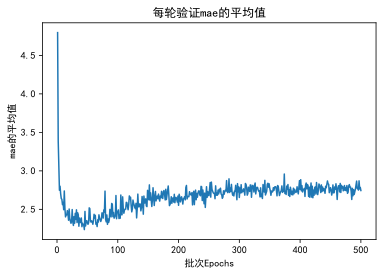

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

plt.plot(range(1, len(avg_mae_history)+1), avg_mae_history)
plt.title('每轮验证mae的平均值')
plt.xlabel('批次Epochs')
plt.ylabel('mae的平均值')
#plt.legend()
plt.show()

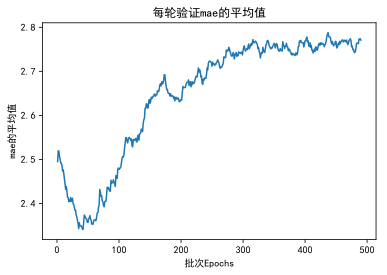

In [29]:
#删除前10个过大的数据点
#将每个数据点替换为前面数据点的指数移动平均值，以便得到光滑曲线

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_history_mae = smooth_curve(avg_mae_history[10:])

plt.plot(range(1, len(smooth_history_mae)+1), smooth_history_mae)
plt.title('每轮验证mae的平均值')
plt.xlabel('批次Epochs')
plt.ylabel('mae的平均值')
#plt.legend()
plt.show()

In [58]:
test_data[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [59]:
#根据图像选择合适的迭代次数后进行预测

model = build_model()
model.fit(train_data, train_targets, epochs=40, batch_size=1, verbose=0) 
#mae_history = history.history['val_mean_absolute_error']
test_mse, test_mae = model.evaluate(test_data, test_targets, verbose=1)
print(test_mse, test_mae)

102/102 [==============================] - 0s 1ms/step
14.807624517702589 2.358425215178845
